## Capstone Project - The Battle of the Neighborhoods (Week2) 
**Applied Data Science Capstone by IBM/Coursera Table of contents**

### 1.[Introduction: Business Problem](#introduction)
### 2.[Datasets](#data)
### 3.[Methodology](#methodology)
### 4.[Analysis](analysis)
### 5.[Results and Discussion](#results)
### 6.[Conclusion](#conclusion)

### 1.Introduction: Business Problem <a name="introduction"></a>

Paris, capital of France, is one of the most important and influential cities in the world. In terms of tourism, Paris is the second most visited city in Europe. 

The purpose of this project is to provide potential investors the best decisions possible to open a hotel in Paris, France. 

In Paris, like in the most of the western big cities of Europe, the coronavirus(Covid-19) has a significant impact on tourism market or real estate & property market, but despite this situation, a large number of firms & their analysts believe that the tourism market could make a recovery by 2022.

Regarding our project, to make an optimal recommendation for the site selection for a hotel, we will explore and answer the following questions:

1. How does location influence to open an hotel property ? 

2. How close it is the potential location to the top attractions? 

The secondary criteria for the site selection will be also the availability of restaurants, bars and accessibility to public transport and parking

Finally, we use our data science knowledge using Machine Learning to generate the best option of district based on these criteria. 

In order to solve this business problem, we will cluster the Paris areas based on the distance to the attractions and the amenities, i.e. transport, restaurants, bars. We will then compare these clusters with the average for each cluster. This will provide valuable information on whether a location is a viable choice for investors.

Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.



### 2.Datasets <a name="data"></a>
Paris is divided in 20 districts (Arrondissements).  Each districts has its own postal code, starting at 75001 to 75020 and corresponding to district 1 through 20.

The  Postal code dataset was downloaded from the datanova.laposte.fr website (French postal service).
The json file named laposte_hexasmal was read and used for this analysis.

A geojson file for the limits of each district was also downloaded from https://www.data.gouv.fr/fr/datasets/arrondissements-1/

The FourSquare API will be used to access and explore venues and amenities based on the Latitude and Longitude collected using the json file from datanova.laposte.fr website (laposte_hexasmal.json), which will then be read into a dataframe for data wrangling and cleaning.

Based on definition of our problem, factors that will influence our decission are:

 - number of existing hotels in the neighborhood (any type of hotel category)
 - distance from potential location to the top attractions in paris
    
Also, the top attractions are taken from www.tripadvisor.com are:
 - Musee d’Orsay 
 - Sainte-Chapelle 
 - Palais Garnier — Opera
 - Notre Dame Cathedral
 - Musee de l’Orangerie
 - Luxembourg Gardens
 - Louvre
 - Eiffel
 - Pont Alexandre III
 - Le Marais

In order to define our potential locations, we decided to use the center of each districts.


### District Candidates
We create the latitude & longitude coordinates for centroids of our candidate. As we already mention before, we decided to use the center of each districts, the postal codes of Paris for our potential locations.
We are interested just for zipcodes 75001–75020 correspond to district 1 through 20 in Paris.

### Exploring Datasets 
- Let's first import the libraries, functions that we will need.

In [342]:
import pandas as pd
import numpy as np
import json
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries imported.')

Libraries imported.


- Load the list of postal codes of Paris 

In [343]:
#read the data from the json file ("laposte_hexasmal")
datap = pd.read_json('https://datanova.laposte.fr/explore/dataset/laposte_hexasmal/download/?format=json')
datap

,datasetid,recordid,fields,geometry,record_timestamp
0,laposte_hexasmal,3c535b8fd874a8801f1f1441e49020b1bb19c3ab,"{'code_commune_insee': '01004', 'nom_de_la_com...","{'type': 'Point', 'coordinates': [5.3729257777...",2021-02-20T00:13:00Z
1,laposte_hexasmal,60ec8e153fd1dae8db09308c95dcef7e7a29836e,"{'code_commune_insee': '01008', 'nom_de_la_com...","{'type': 'Point', 'coordinates': [5.3328092349...",2021-02-20T00:13:00Z
2,laposte_hexasmal,a499405b7273bf33265de31f3e8c8f770857b737,"{'ligne_5': 'ST BOIS', 'code_commune_insee': '...","{'type': 'Point', 'coordinates': [5.6526308642...",2021-02-20T00:13:00Z
3,laposte_hexasmal,d7af047b53af8f8e8c8a8518bb14a88aa7882b5b,"{'code_commune_insee': '01017', 'nom_de_la_com...","{'type': 'Point', 'coordinates': [5.4825110031...",2021-02-20T00:13:00Z
4,laposte_hexasmal,75b4293f4938479498a2bc8ffbd1a84668481d67,"{'code_commune_insee': '01019', 'nom_de_la_com...","{'type': 'Point', 'coordinates': [5.5835783869...",2021-02-20T00:13:00Z
...,...,...,...,...,...
39187,laposte_hexasmal,db10289bd074cc9cf3317b96e4ae20f4001d94b4,"{'nom_de_la_commune': 'POUEBO', 'code_postal':...",NaN,2021-02-20T00:13:00Z
39188,laposte_hexasmal,97719f28a9dc42fd448347b2fb6dc01ad4003e16,"{'nom_de_la_commune': 'POUEMBOUT', 'code_posta...",NaN,2021-02-20T00:13:00Z
39189,laposte_hexasmal,a3007754b816e668bb432530ce63aa0e6bf363b1,"{'nom_de_la_commune': 'SARRAMEA', 'code_postal...",NaN,2021-02-20T00:13:00Z
39190,laposte_hexasmal,bf472305e66faf4949e9808bcb7e32f9c2e0590b,"{'nom_de_la_commune': 'TOUHO', 'code_postal': ...",NaN,2021-02-20T00:13:00Z


In [344]:
data_paris=datap['fields']
dataframe = json_normalize(data_paris)
dataframe.head()

<ipython-input-344-e2000afdff21>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(data_paris)


,code_commune_insee,nom_de_la_commune,code_postal,coordonnees_gps,libelle_d_acheminement,ligne_5
0,01004,AMBERIEU EN BUGEY,01500,"[45.9608475114, 5.3729257777]",AMBERIEU EN BUGEY,NaN
1,01008,AMBUTRIX,01500,"[45.9367134524, 5.3328092349]",AMBUTRIX,NaN
2,01015,ARBOYS EN BUGEY,01300,"[45.7237621545, 5.65263086429]",ARBOYS EN BUGEY,ST BOIS
3,01017,ARGIS,01230,"[45.9337182132, 5.48251100314]",ARGIS,NaN
4,01019,ARMIX,01510,"[45.8541838459, 5.58357838695]",ARMIX,NaN


**We will select just the features revelant for this project 'code_postal' and 'coordonnees_gps' and we will clean our data and wrangling our data**

In [345]:
# we keep only columns that include cod postal and coordonnates, and the rest will deleted
# print Size of dataframe
filtered_columns = ['code_postal'] + ['coordonnees_gps']
dataframe_filtered = dataframe.loc[:, filtered_columns]
print('Size of dataframe is:',dataframe_filtered.shape)
dataframe_filtered

Size of dataframe is: (39192, 2)


,code_postal,coordonnees_gps
0,01500,"[45.9608475114, 5.3729257777]"
1,01500,"[45.9367134524, 5.3328092349]"
2,01300,"[45.7237621545, 5.65263086429]"
3,01230,"[45.9337182132, 5.48251100314]"
4,01510,"[45.8541838459, 5.58357838695]"
...,...,...
39187,98824,NaN
39188,98825,NaN
39189,98882,NaN
39190,98831,NaN


In [346]:
#We clean our data, removing NaN values 
#print the Size of dataframe
dataframe_clean=dataframe_filtered.dropna()
dataframe_clean.reset_index(drop=True)
print('Size of dataframe is:',dataframe_clean.shape)
dataframe_clean

Size of dataframe is: (38922, 2)


,code_postal,coordonnees_gps
0,01500,"[45.9608475114, 5.3729257777]"
1,01500,"[45.9367134524, 5.3328092349]"
2,01300,"[45.7237621545, 5.65263086429]"
3,01230,"[45.9337182132, 5.48251100314]"
4,01510,"[45.8541838459, 5.58357838695]"
...,...,...
39130,97426,"[-21.1104753596, 55.3297522865]"
39131,97620,"[-12.9244813606, 45.0984953615]"
39132,97660,"[-12.8534223602, 45.1755961092]"
39133,97615,"[-12.7791666355, 45.2822648358]"


In [347]:
#use zip to unzip dataframe into separate columns lat, lng and df.pop commnad to drop the old column
dataframe_clean['lat'],dataframe_clean['lng']=zip(*dataframe_clean.pop('coordonnees_gps'))
dataframe_clean

<ipython-input-347-c82f5ee78936>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_clean['lat'],dataframe_clean['lng']=zip(*dataframe_clean.pop('coordonnees_gps'))


,code_postal,lat,lng
0,01500,45.960848,5.372926
1,01500,45.936713,5.332809
2,01300,45.723762,5.652631
3,01230,45.933718,5.482511
4,01510,45.854184,5.583578
...,...,...,...
39130,97426,-21.110475,55.329752
39131,97620,-12.924481,45.098495
39132,97660,-12.853422,45.175596
39133,97615,-12.779167,45.282265


**We are interested just for zipcodes 75001–75020 correspond to district(Arrondissements) 1 through 20 in Paris. So, we will filter our data kepping just the code_postal start with '750'**

In [348]:
# print new dataframe and Number of district in Paris
df_Paris=dataframe_clean[dataframe_clean['code_postal'].str.startswith('750')].reset_index(drop=True)
print('Number of district in Paris :', df_Paris.count())
df_Paris

Number of district in Paris : code_postal    20
lat            20
lng            20
dtype: int64


,code_postal,lat,lng
0,75004,48.854228,2.357362
1,75007,48.856083,2.312439
2,75011,48.859415,2.378741
3,75015,48.840155,2.293559
4,75020,48.863187,2.400820
5,75006,48.848968,2.332671
6,75012,48.835156,2.419807
7,75013,48.828718,2.362468
8,75018,48.892735,2.348712
9,75002,48.867903,2.344107


As we see our data is looking good.

## Foursquare

We will use Foursquare API to get information on hotels in each district. We're interested in venues of 'hotel' category, especially in the venues that have 'hotel' in category name. 

### Define Foursquare Credentials and Version in hidden cell bellow

In [1]:
#@hidden_cell
CLIENT_ID = 'removed for security' # Foursquare ID
CLIENT_SECRET = 'removed for security' # Foursquare Secret
ACCESS_TOKEN = 'removed for security' # FourSquare Access Token


VERSION = '20180724' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS=500

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

## Explore Neighborhoods in Paris

In [350]:
# Category IDs corresponding to Hotel category were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):
hotel_category = '4bf58dd8d48988d1fa931735' # 'Root' category for all hotels-related venues
metro_category = '4bf58dd8d48988d1fd931735' # 'Root' category for metro station
bus_category = '52f2ab2ebcbc57f1066b8b4f' # 'Root' category for bus stop
museum_category='4bf58dd8d48988d181941735'
restaurant_category='4d4b7105d754a06374d81259'
bar_category='4d4b7105d754a06376d81259'
parking_category='4c38df4de52ce0d596b336e1'

def get_hotels_count_near_location(latitude, longitude, category):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&oauth_token={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET, VERSION,ACCESS_TOKEN, latitude, longitude, category, RADIUS,LIMIT)
    jSon=requests.get(url).json()
    return (jSon['response']['totalResults'])

We add a new columns :
- 'Number_Hotels' (number of hotels nearby our location),
- 'Number_Metro' (number of metro nearby our location),
- 'Number_Bus_Stop' (number of metro nearby our location)


Let's create a function to repeat the same process to all the districts(arrondissements) in Paris

In [351]:
for index in df_Paris.index:
    print(df_Paris.loc[index]['code_postal'])
    df_Paris.loc[index,'Number_Hotels']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],hotel_category)
    df_Paris.loc[index,'Numbers_Metro']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],metro_category)
    df_Paris.loc[index,'Number_Bus_Stop']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],bus_category)
    df_Paris.loc[index,'Number_Museum']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],museum_category)
    df_Paris.loc[index,'Number_Restaurant']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],restaurant_category)
    df_Paris.loc[index,'Number_Bar']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],bar_category)
    df_Paris.loc[index,'Number_Parking']=get_hotels_count_near_location(df_Paris.loc[index]['lat'],df_Paris.loc[index]['lng'],parking_category)
    

75004
75007
75011
75015
75020
75006
75012
75013
75018
75002
75003
75008
75014
75016
75017
75019
75001
75005
75009
75010


In [352]:
print('Disply the column name of dataframe :', df_Paris.columns.values)
df_Paris.describe()

Disply the column name of dataframe : ['code_postal' 'lat' 'lng' 'Number_Hotels' 'Numbers_Metro'
 'Number_Bus_Stop' 'Number_Museum' 'Number_Restaurant' 'Number_Bar'
 'Number_Parking']


,lat,lng,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,48.860290,2.344437,27.300000,3.050000,4.500000,2.750000,104.650000,28.500000,3.600000
std,0.018763,0.037009,22.501696,1.538112,2.438723,2.653201,55.678849,26.025291,2.779625
min,48.828718,2.262100,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,48.847853,2.323471,12.500000,2.000000,2.750000,1.000000,73.000000,6.750000,1.750000
50%,48.861515,2.346410,23.000000,3.000000,4.500000,2.500000,101.000000,22.000000,3.000000
75%,48.873403,2.361452,39.500000,4.000000,6.000000,4.000000,146.500000,42.750000,4.250000
max,48.892735,2.419807,87.000000,6.000000,11.000000,11.000000,199.000000,99.000000,9.000000


We will calculation the distance between 2 locations, more exactly between our districts and the top attractions(www.tripadvisor.com website):
 - Musee d’Orsay, 2.326561 , 48.859961
 - Sainte-Chapelle, 2.344961 ,48.855375
 - Palais Garnier — Opera, 2.331601, 48.871970
 - Notre Dame Cathedral, 2.349902, 48.852968
 - Musee de l’Orangerie, 2.322672, 48.863788
 - Luxembourg Gardens, 2.337160, 48.846222
 - Louvre, 2.337644, 48.860611
 - Eiffel, 2.294481, 48.858370
 - Pont Alexandre III, 2.313559, 48.863900
 - Le Marais, 2.358189, 48.861233

An other important feature for the selection of the optimal location of the hotel we also consider the distance to the top 10 attraction in Paris.

In [353]:
#We creat a dataframe with top 10 attractions in Paris
top= {
    'Name_atraction' : ['Musee_Orsay', 'Sainte_Chapelle', 'Palais_Garnier', 'Notre_Dame', 'Musee_Orangerie', 'Luxembourg_Gardens', 'Louvre', 'Eiffel', 'Pont_Alexandre', 'Marais'],
    'Latitude' : [48.859961,48.855375,48.871970,48.852968, 48.863788,48.846222,48.860611,48.858370,48.863900,48.861233],
    'Longitude' : [2.326561,2.344961,2.331601,2.349902,2.322672,2.337160,2.337644,2.294481,2.313559,2.358189],
}    
df_top=pd.DataFrame(top)
print('Data dimension of the resulting dataframe:', df_top.shape)

Data dimension of the resulting dataframe: (10, 3)


In [354]:
# we will define function get_distance that calculate the distance between two coordonates
from math import sin, cos, sqrt, atan2, radians
def get_distance(lat,lng,Latitude,Longitude,inKm=True,precision=2):
    # approximate radius of earth in km
    R = 6373.0
    if inKm==False: #we want in meters so adjust the radius to meters
        R=R*1000
    
    #convert degrees to radians -> Deg × π/180
    lat1 = radians(lat)
    lon1 = radians(lng)
    lat2 = radians(Latitude)
    lon2 = radians(Longitude)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return round(R * c, precision)


We calculate the distance from our location candidate and the top 10 attractions

In [355]:
for index in df_Paris.index:
    #print(df_Paris.loc[index]['code_postal'])
    for index2 in df_top.index:
        #print("--",df_top.loc[index2]['Name_atraction'])
        df_Paris.loc[index, "DistanceTo."+df_top.loc[index2]['Name_atraction']   ]=get_distance(df_Paris.loc[index]['lat'],
                                                    df_Paris.loc[index]['lng'],
                                                    df_top.loc[index2]['Latitude'],
                                                    df_top.loc[index2]['Longitude'])
df_Paris

,code_postal,lat,lng,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking,DistanceTo.Musee_Orsay,DistanceTo.Sainte_Chapelle,DistanceTo.Palais_Garnier,DistanceTo.Notre_Dame,DistanceTo.Musee_Orangerie,DistanceTo.Luxembourg_Gardens,DistanceTo.Louvre,DistanceTo.Eiffel,DistanceTo.Pont_Alexandre,DistanceTo.Marais
0,75004,48.854228,2.357362,39.0,3.0,2.0,5.0,157.0,48.0,4.0,2.34,0.92,2.73,0.56,2.75,1.73,1.61,4.62,3.38,0.78
1,75007,48.856083,2.312439,30.0,3.0,2.0,6.0,83.0,10.0,2.0,1.12,2.38,2.26,2.76,1.14,2.12,1.91,1.34,0.87,3.40
2,75011,48.859415,2.378741,19.0,2.0,3.0,3.0,95.0,29.0,1.0,3.82,2.51,3.72,2.23,4.13,3.38,3.01,6.17,4.80,1.52
3,75015,48.840155,2.293559,15.0,4.0,5.0,0.0,105.0,7.0,2.0,3.27,4.13,4.50,4.36,3.38,3.26,3.95,2.03,3.02,5.28
4,75020,48.863187,2.400820,4.0,2.0,4.0,1.0,51.0,12.0,4.0,5.45,4.18,5.16,3.90,5.72,5.03,4.63,7.80,6.39,3.13
5,75006,48.848968,2.332671,27.0,5.0,7.0,4.0,109.0,39.0,3.0,1.30,1.15,2.56,1.34,1.80,0.45,1.35,2.98,2.17,2.31
6,75012,48.835156,2.419807,0.0,0.0,2.0,0.0,5.0,0.0,0.0,7.36,5.92,7.64,5.49,7.79,6.17,6.65,9.53,8.41,5.36
7,75013,48.828718,2.362468,8.0,3.0,8.0,1.0,97.0,5.0,4.0,4.36,3.23,5.32,2.85,4.87,2.69,3.99,5.97,5.30,3.63
8,75018,48.892735,2.348712,14.0,3.0,4.0,1.0,75.0,19.0,1.0,3.99,4.16,2.63,4.42,3.74,5.24,3.66,5.51,4.11,3.57
9,75002,48.867903,2.344107,43.0,4.0,2.0,3.0,199.0,99.0,8.0,1.56,1.39,1.02,1.71,1.63,2.46,0.94,3.78,2.28,1.27


We insert the column that hold the Total distance to all the attractions

In [356]:
df_Paris.insert(10,"Total_distance",df_Paris.apply(lambda row: row[11 : ].sum(),axis=1))
df_Paris.columns.values

array(['code_postal', 'lat', 'lng', 'Number_Hotels', 'Numbers_Metro',
       'Number_Bus_Stop', 'Number_Museum', 'Number_Restaurant',
       'Number_Bar', 'Number_Parking', 'Total_distance',
       'DistanceTo.Musee_Orsay', 'DistanceTo.Sainte_Chapelle',
       'DistanceTo.Palais_Garnier', 'DistanceTo.Notre_Dame',
       'DistanceTo.Musee_Orangerie', 'DistanceTo.Luxembourg_Gardens',
       'DistanceTo.Louvre', 'DistanceTo.Eiffel',
       'DistanceTo.Pont_Alexandre', 'DistanceTo.Marais'], dtype=object)

### Let's create a map centered around Paris and play with the zoom level to see how it affects the top location map

In [357]:
# create map of Paris 
paris_map = folium.Map(location=[48.859489, 2.320582], zoom_start=12)


# instantiate a feature group for the incidents in the dataframe
Paris_group = folium.map.FeatureGroup()
# loop through the district and add each to the incidents feature group
#set the color of the location either yeallow (below average number of hotels or red for above average)
for lat, lng, label,hotel in zip(df_Paris.lat, df_Paris.lng, df_Paris.code_postal, df_Paris.Number_Hotels):
    outercolor='blue'
    if hotel > 27:  #27 being the mean number of hotels
        outercolor='red'
    Paris_group.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color=outercolor,
            popup=("{}: number hotel {}").format(label,int(hotel)),
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

# add incidents to map
paris_map.add_child(Paris_group)

# instantiate a feature group for the top 10 attraction in Paris
Paris_top10 = folium.map.FeatureGroup()
# loop through the district and add each to the incidents feature group
for lat, lng, label in zip(df_top.Latitude, df_top.Longitude, df_top.Name_atraction):
    Paris_top10.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='green',
            popup=label,
            fill=True,
            #fill_color='red',
            fill_opacity=1
        )
    )

# add incidents to map
paris_map.add_child(Paris_top10)

# add incidents to map
paris_map.add_child(Paris_group)
   
paris_map

### 3.Methodology<a name="methodology"></a>
In this project we will focus to make an optimal recommendation for the site selection of a hotel. 

My master data will have the main components: list of districts with chosen features and location of attractions.

In our analysis will do the calculation and exploration of venues across each districts of Paris.
 - We will used python folium library to visualize geographic details of Paris.
 - We will utilize the Foursquare API to explore the districts and segment them.
 - We will analyze the link between the number of hotels and the distance to attractions (heatmaps, correlation,...) to help focus our attention on ideal areas
 - We will used unsupervised learning K-means algorithm to cluster the districts.
 - We will present map all potential locations but also create clusters (using k-means clustering) to identify the optimal recommendation for the site.
 - We will used also, GitHub as our repository.
 
 In the first step in our analysis we have collected the distance from our potential locations to top attractions in Paris, the availability of existing hotels, restaurants, bars and accessibility to public transport and parking. We also cleaned, selected and mapped the features we are interested in.
The second step in our analysis will be exploring our datasets, we will identify the relationships between our features.
In the third step we will focus on creating clusters (using **k-means clustering**) of those locations and their features to identify the optimal districts for our potential location.
Finally, we will identify and optimal propose location to stakeholders

 

### 4.Analysis <a name="analysis"></a>

Now let's calculate two most important things for each location candidate: 
- the relationship between number of hotels in vicinity and the distance to the top attractions
- the relationship between the potential location, total distance, numbers restaurants and numbers of bars.

#### Relation between the principal feature Number_Hotels and Total_distance 

In order to measure the relationship between these two variables (Number_Hotels and Total_distance) we will proceed as following:
1. we will calculate the covariance
2. we will do regplot to shows this relationship 
3. we will calculate Pearson's correlation and P-value

1.	Covariance 
The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). A covariance value of zero indicates that both variables are completely independent.
As we can see bellow, the covariance between the two variables is -211.54. The covariance is negative, suggesting the variables change in opposite direction as we expect. If the covariance between the two variables was positive, was suggesting the variables change in the same direction.



In [358]:
from numpy import cov
cov_hot_dist = cov(df_Paris['Number_Hotels'], df_Paris['Total_distance'])
print('Covariance between Number_Hotels and Total_distance : '), cov(df_Paris['Number_Hotels'], df_Paris['Total_distance'])                 

Covariance between Number_Hotels and Total_distance : 


(None,
 array([[ 506.32631579, -211.54089474],
        [-211.54089474,  171.74408921]]))

As we can see, the covariance between the two variables is -211.54. 
The covariance is negative, suggesting the variables change in opposite direction as we expect.
If the covariance between the two variables was positive, was suggesting the variables change in the same direction.

2. Regplot

(0.0, 67.34616737497244)

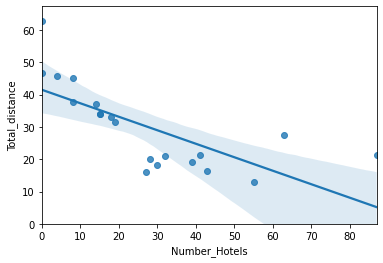

In [359]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
sns.regplot(x='Number_Hotels', y='Total_distance', data=df_Paris)
plt.ylim(0,)

3. Pearsons correlation and P-value

In [360]:
from scipy.stats import pearsonr
from scipy import stats
pearson_coef, p_value  = stats.pearsonr(df_Paris['Number_Hotels'], df_Paris['Total_distance'])
print('The Pearson Correlation is', pearson_coef, 'with a P_value of P =', p_value)

The Pearson Correlation is -0.7173617022958616 with a P_value of P = 0.00037043601871914215


The Pearsons correlation (-0.717) shows a inverse/negative relationship 
When looking at a regression plot is to pay attention to how scattered the data points are around the regression line , a good indication of the variance of the data, and whether a linear model would be the best fit or not

Correlation coefficient (by default Pearson’s correlation coefficient ) shows what type of relations is : positive, negative correlation or no correlation between the variables (0), it a measure of the extent of interdependence between variables
P-value will tell us how certain we are about the correlation (the relation is supposed be linear relationships) that we calculated betwen these 2 features. 


#### Conclusion:Since the p-value is <0.001, the correlation between (Number_Hotels and Total_distance) is statistically significant, and the negative linear relationship is quite strong (~-0.717).

####  Plotting relationship between the total distance, numbers restaurants and numbers of bars and potential location

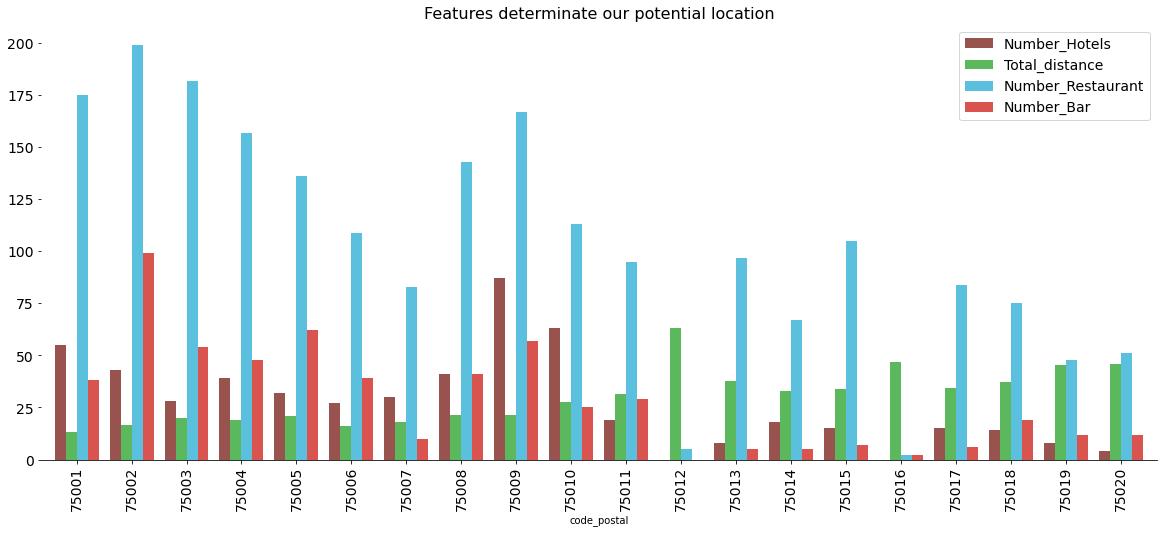

In [361]:
#we plot the data to see the relationship between the features:
df_plot=df_Paris[['code_postal','Number_Hotels','Total_distance','Number_Restaurant','Number_Bar']].sort_values(['code_postal'], ascending=True, axis=0)
df_plot.set_index('code_postal', inplace=True)
ax=df_plot.plot(kind='bar', 
                  figsize=(20, 8), 
                  width=0.8, 
                  color=('#98534f','#5cb85c', '#5bc0de', '#d9534f'), 
                  fontsize=14)
ax.set_title("Features determinate our potential location", 
             fontsize = 16)
ax.legend(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  
#for p in ax.patches:
#    ax.annotate("{:.2%}".format(p.get_height()),
#                xy=(p.get_x()+0.02, p.get_height()+0.01))


Bellow we can see some basic statistical details like percentile, mean, std etc of our dataframe for selected features that we are interested.

In [362]:
df_Paris[['Number_Hotels', 'Numbers_Metro', 'Numbers_Metro',
       'Number_Bus_Stop', 'Number_Museum', 'Number_Restaurant',
       'Number_Bar', 'Number_Parking', 'Total_distance']].describe().round(decimals=3)

,Number_Hotels,Numbers_Metro,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking,Total_distance
count,20.000,20.000,20.000,20.000,20.000,20.000,20.000,20.00,20.000
mean,27.300,3.050,3.050,4.500,2.750,104.650,28.500,3.60,30.134
std,22.502,1.538,1.538,2.439,2.653,55.679,26.025,2.78,13.105
min,0.000,0.000,0.000,1.000,0.000,2.000,0.000,0.00,13.060
25%,12.500,2.000,2.000,2.750,1.000,73.000,6.750,1.75,19.822
50%,23.000,3.000,3.000,4.500,2.500,101.000,22.000,3.00,29.450
75%,39.500,4.000,4.000,6.000,4.000,146.500,42.750,4.25,37.242
max,87.000,6.000,6.000,11.000,11.000,199.000,99.000,9.00,62.960


In [363]:
print('Average distance to closest Hotel from each top:', df_Paris['Total_distance'].mean())

Average distance to closest Hotel from each top: 30.134499999999996


We will order the best potential location according with the min distance to the best top attractions in Paris, knowing that the Average distance to closest Hotel from each top: 30.13

In [364]:
#order our dataframe by Total_distance
df_Paris.sort_values(['Total_distance'], ascending=True, axis=0, inplace=True)
df_distance=df_Paris[['code_postal', 'Total_distance']]
df_distance

,code_postal,Total_distance
16,75001,13.06
5,75006,16.11
9,75002,16.48
1,75007,18.18
0,75004,19.08
10,75003,20.07
17,75005,21.13
18,75009,21.35
11,75008,21.42
19,75010,27.43


#### Relationship between transportation and possible location
The heatmap plots the target variable 'cod postal of potential locations' proportional to colour with respect to the variables 'Numbers_Metro','Number_Bus_Stop','Number_Parking'' in the horizontal and vertical axis respectively. 
This allows us to visualize how the cod postal of potential locations is related to the transport connections  as 'Numbers_Metro','Number_Bus_Stop','Number_Parking'.



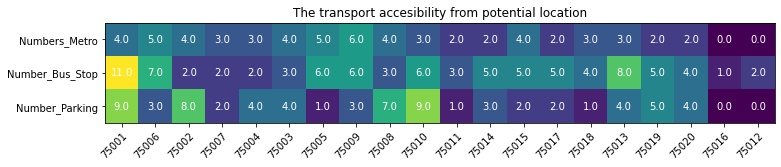

In [366]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2


tran = ['Numbers_Metro','Number_Bus_Stop','Number_Parking']
far = df_Paris['code_postal'].to_list()

harvest = df_Paris[['Numbers_Metro','Number_Bus_Stop','Number_Parking']].transpose().values


fig, ax = plt.subplots(figsize=(12, 8))

#fig.tight_layout()
#plt.show()

im = ax.imshow(harvest)

# We want to show all ...
ax.set_xticks(np.arange(len(far)))
ax.set_yticks(np.arange(len(tran)))
# ... and label them with the respective list entries
ax.set_xticklabels(far)
ax.set_yticklabels(tran)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(tran)):
    for j in range(len(far)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("The transport accesibility from potential location")
#fig.tight_layout()
plt.show()

#### Relationship between multiple variables at the same time
In order to find this, we can use correlation matrix build with the Pearson’s correlation coefficient show us both the strength of the relationship and its direction (positive or negative correlations).We will use seaborn’s heatmap() method to plot the matrix. 

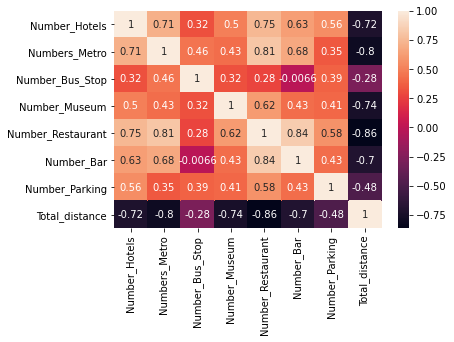

In [367]:
#Correlation matrix to get a table containing the correlation coefficients between each variable and the others.
df_small=df_Paris[['Number_Hotels',
       'Numbers_Metro', 'Number_Bus_Stop', 'Number_Museum',
       'Number_Restaurant', 'Number_Bar', 'Number_Parking',
       'Total_distance']].corr()
df_small
sns.heatmap(df_small, annot=True)
plt.show()

As we can know already and we can see in this heatmap, the correlation between number hotels and total distance is negative (- 0,72) and an other negative correlation is between number parking and total distance (-0,48) or number of bus stop and total distance suggesting the variables change in opposite direction as we expect. 
For the rest of variables, the covariance between the two variables were positive, suggesting the variables change in the same direction.


### Modeling


#### 1. Optimising K - Elbow Method

The Elbow Method is used to determine the optimal value of k as this is one of the most popular methods.

We will be using 2 metric values calculated from a range of k values in order to determine the 'elbow point', i.e. the point after which the metrics starts decreasing linearly.

Those 2 metric values are:

    -Distortion: Calculated as the average of the squared distances from the cluster centres of the respective clusters where typically the Euclidean distance is used.
    -Inertia: The sum of squared distances of samples to their closest cluster centre.


In [368]:
#build dataframe to use with kMean and elbow method
from sklearn import metrics
from scipy.spatial.distance import cdist

df_Paris_k = df_Paris[['Number_Hotels', 'Numbers_Metro',
       'Number_Bus_Stop', 'Number_Museum', 'Number_Restaurant',
       'Number_Bar', 'Number_Parking', 'Total_distance',
       'DistanceTo.Musee_Orsay', 'DistanceTo.Sainte_Chapelle',
       'DistanceTo.Palais_Garnier', 'DistanceTo.Notre_Dame',
       'DistanceTo.Musee_Orangerie', 'DistanceTo.Luxembourg_Gardens',
       'DistanceTo.Louvre', 'DistanceTo.Eiffel',
       'DistanceTo.Pont_Alexandre', 'DistanceTo.Marais']].values


In [369]:
from scipy.spatial.distance import cdist
distortions = []
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_Paris_k)
    distortions.append(sum(np.min(cdist(df_Paris_k, km.cluster_centers_, 
                      'euclidean'),axis=1)) / df_Paris_k.shape[0]) 
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5, 0, 'k')

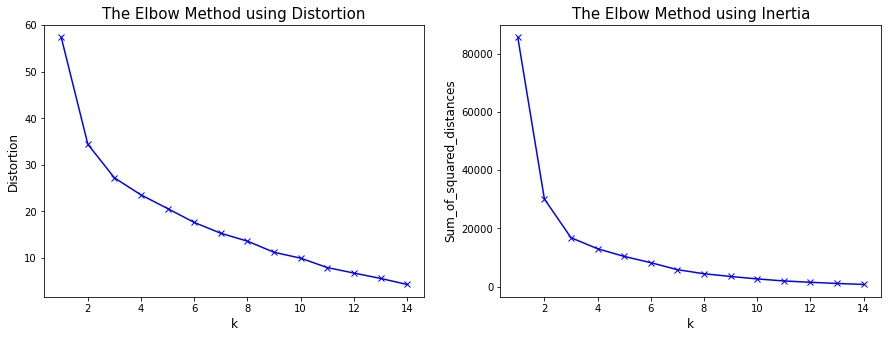

In [370]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(K, distortions, 'bx-')
ax2.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_title('The Elbow Method using Distortion', fontsize = 15)
ax2.set_title('The Elbow Method using Inertia', fontsize = 15)
ax1.set_ylabel('Distortion', fontsize = 12)
ax2.set_ylabel('Sum_of_squared_distances', fontsize = 12)
ax1.set_xlabel('k', fontsize = 12)
ax2.set_xlabel('k', fontsize = 12)

**We deduce that k=3 is the optimal K**

#### 2. Clustering using KMeans

**Clustering or cluster analysis is the process of dividing data into groups (clusters) in such a way that objects in the same cluster are more similar to each other than those in other clusters.**

In [371]:
from sklearn.cluster import KMeans

number_of_clusters = 3

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(df_Paris_k)

kmeans.labels_
#grab the labels for each point in the model using Kmean

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2])

In [372]:
#Insert column Cluster Labels in the first position of dataframe
df_Paris.insert(0, 'Cluster Labels', kmeans.labels_)

In [373]:
#our dataframe with new column Cluster Labels
df_Paris

,Cluster Labels,code_postal,lat,lng,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,...,DistanceTo.Musee_Orsay,DistanceTo.Sainte_Chapelle,DistanceTo.Palais_Garnier,DistanceTo.Notre_Dame,DistanceTo.Musee_Orangerie,DistanceTo.Luxembourg_Gardens,DistanceTo.Louvre,DistanceTo.Eiffel,DistanceTo.Pont_Alexandre,DistanceTo.Marais
16,1,75001,48.862630,2.336293,55.0,4.0,11.0,11.0,175.0,38.0,...,0.77,1.03,1.09,1.47,1.01,1.83,0.25,3.10,1.67,1.61
5,0,75006,48.848968,2.332671,27.0,5.0,7.0,4.0,109.0,39.0,...,1.30,1.15,2.56,1.34,1.80,0.45,1.35,2.98,2.17,2.31
9,1,75002,48.867903,2.344107,43.0,4.0,2.0,3.0,199.0,99.0,...,1.56,1.39,1.02,1.71,1.63,2.46,0.94,3.78,2.28,1.27
1,0,75007,48.856083,2.312439,30.0,3.0,2.0,6.0,83.0,10.0,...,1.12,2.38,2.26,2.76,1.14,2.12,1.91,1.34,0.87,3.40
0,1,75004,48.854228,2.357362,39.0,3.0,2.0,5.0,157.0,48.0,...,2.34,0.92,2.73,0.56,2.75,1.73,1.61,4.62,3.38,0.78
10,1,75003,48.863054,2.359361,28.0,4.0,3.0,5.0,182.0,54.0,...,2.42,1.36,2.26,1.32,2.69,2.48,1.61,4.78,3.35,0.22
17,1,75005,48.844509,2.349859,32.0,5.0,6.0,3.0,136.0,62.0,...,2.42,1.26,3.33,0.94,2.93,0.95,2.00,4.34,3.42,1.96
18,1,75009,48.876896,2.337460,87.0,6.0,6.0,3.0,167.0,57.0,...,2.05,2.46,0.70,2.81,1.82,3.41,1.81,3.76,2.27,2.31
11,1,75008,48.872527,2.312583,41.0,4.0,3.0,4.0,143.0,41.0,...,1.73,3.04,1.39,3.49,1.22,3.43,2.26,2.06,0.96,3.57
19,0,75010,48.876029,2.361113,63.0,3.0,6.0,1.0,113.0,25.0,...,3.10,2.58,2.21,2.69,3.12,3.75,2.43,5.26,3.73,1.66


We will creat a new dataframe paris2, that contain just 4 columns sorted by Cluster Labels

In [374]:
df_Paris2=df_Paris[['Cluster Labels','code_postal','Number_Hotels','Total_distance']].sort_values(['Cluster Labels'], ascending=True, axis=0).reset_index(drop=True)
df_Paris2

,Cluster Labels,code_postal,Number_Hotels,Total_distance
0,0,75010,63.0,27.43
1,0,75006,27.0,16.11
2,0,75013,8.0,37.85
3,0,75007,30.0,18.18
4,0,75018,14.0,37.04
5,0,75017,15.0,34.19
6,0,75015,15.0,33.91
7,0,75014,18.0,32.99
8,0,75011,19.0,31.47
9,1,75001,55.0,13.06


### Creating a Choropleth map
We will use the choropleth method with the following main parameters:
     -geo_data, which is the GeoJSON file from https://www.data.gouv.fr/fr/datasets/arrondissements-1/
    -data, which is the dataframe containing the data.
    -columns, which represents the columns in the dataframe that will be used to create the Choropleth map.
    -key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. 

In [375]:
df_choropleth=df_Paris[['code_postal','Cluster Labels']].sort_values('Cluster Labels').reset_index(drop=True) 
df_choropleth=df_choropleth.astype(int)
df_choropleth['code_postal']=df_choropleth['code_postal']+100
df_choropleth

,code_postal,Cluster Labels
0,75110,0
1,75106,0
2,75113,0
3,75107,0
4,75118,0
5,75117,0
6,75115,0
7,75114,0
8,75111,0
9,75101,1


In [376]:
#to load the geoJson file for Paris arrondissment
paris_geo = r'C:/Users/ruxan/Desktop/GABI/CERTIFICATION/IBM-DATASCIENT/IBM/Capstone-9/project-week4-5/arrondissements.geojson' # geojson file


#### Now we visualise the clusters using an interactive Plotly map.

In [377]:
# we create the map of Paris and color each district by label
paris_map = folium.Map(location=[48.859489, 2.320582], zoom_start=12)
paris_map.choropleth(
    geo_data=paris_geo,
    data=df_choropleth,
    columns=['code_postal','Cluster Labels', 'Number_Hotels'],
    key_on='feature.properties.c_arinsee',
    threshold_scale=range(number_of_clusters+1),
    fill_color='PuOr', 
    fill_opacity=0.8, 
    line_opacity=0.2,
    legend_name='Cluster Labels from locations in Paris',
    reset=True
)

paris_map.add_child(Paris_group)
paris_map.add_child(Paris_top10)
paris_map

- We will examine each cluster
- We will explore the Means's dataframe of each cluster to see which cluster have the best candidate location.
- We will inspect visual and if will select the Cluster with the minimum of Number_Hotels and Total_distance   


### Examine Clusters

The principal features that will influence our selection of Cluster are as the total distance to the top of attractions and Number Hotels around our potential location to be minimum.
To each of our cluster data frame, we will add a row for the cluster’s mean values of each features.

### Cluster0

In [378]:
df_Paris_1=df_Paris.loc[df_Paris['Cluster Labels'] == 0, df_Paris.columns[list(range(4, 12))]]
df_Paris_1.loc['mean']=df_Paris_1.mean()
for col in df_Paris_1.columns:
   df_Paris_1[col]= df_Paris_1[col].map(lambda x: '%.2f' % x)

df_Paris_1

,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking,Total_distance
5,27.00,5.00,7.00,4.00,109.00,39.00,3.00,16.11
1,30.00,3.00,2.00,6.00,83.00,10.00,2.00,18.18
19,63.00,3.00,6.00,1.00,113.00,25.00,9.00,27.43
2,19.00,2.00,3.00,3.00,95.00,29.00,1.00,31.47
12,18.00,2.00,5.00,1.00,67.00,5.00,3.00,32.99
3,15.00,4.00,5.00,0.00,105.00,7.00,2.00,33.91
14,15.00,2.00,5.00,2.00,84.00,6.00,2.00,34.19
8,14.00,3.00,4.00,1.00,75.00,19.00,1.00,37.04
7,8.00,3.00,8.00,1.00,97.00,5.00,4.00,37.85
mean,23.22,3.00,5.00,2.11,92.00,16.11,3.00,29.91


### Cluster1

In [379]:
df_Paris_2=df_Paris.loc[df_Paris['Cluster Labels'] == 1, df_Paris.columns[list(range(4, 12))]]
df_Paris_2.loc['mean']=df_Paris_2.mean()
#to show the dataframe with decimal we use a loop
for col in df_Paris_2.columns:
   df_Paris_2[col]= df_Paris_2[col].map(lambda x: '%.2f' % x)


df_Paris_2

,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking,Total_distance
16,55.00,4.00,11.00,11.00,175.00,38.00,9.00,13.06
9,43.00,4.00,2.00,3.00,199.00,99.00,8.00,16.48
0,39.00,3.00,2.00,5.00,157.00,48.00,4.00,19.08
10,28.00,4.00,3.00,5.00,182.00,54.00,4.00,20.07
17,32.00,5.00,6.00,3.00,136.00,62.00,1.00,21.13
18,87.00,6.00,6.00,3.00,167.00,57.00,3.00,21.35
11,41.00,4.00,3.00,4.00,143.00,41.00,7.00,21.42
mean,46.43,4.29,4.71,4.86,165.57,57.00,5.14,18.94


### Cluster2

In [380]:
df_Paris_3=df_Paris.loc[df_Paris['Cluster Labels'] == 2, df_Paris.columns[list(range(4, 12))]]
df_Paris_3.loc['mean']=df_Paris_3.mean()
for col in df_Paris_3.columns:
   df_Paris_3[col]= df_Paris_3[col].map(lambda x: '%.2f' % x)

df_Paris_3

,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking,Total_distance
15,8.00,2.00,5.00,0.00,48.00,12.00,5.00,45.31
4,4.00,2.00,4.00,1.00,51.00,12.00,4.00,45.94
13,0.00,0.00,1.00,1.00,2.00,2.00,0.00,46.72
6,0.00,0.00,2.00,0.00,5.00,0.00,0.00,62.96
mean,3.00,1.00,3.00,0.50,26.50,6.50,2.25,50.23


#### The principal's features that will influence our selection of Cluster are as the total distance to the top of attractions and Number Hotels around our potential location to be minimum.

In [381]:
#Creat a new dataframe of Means of each cluster
df_means=pd.DataFrame()
for i in range(number_of_clusters):
    df_means = df_means.append(df_Paris.loc[df_Paris['Cluster Labels'] == i,['Cluster Labels','Number_Hotels','Total_distance']].mean(), ignore_index=True)
df_means.set_index('Cluster Labels', inplace=True)
df_means.round(decimals=3)

,Number_Hotels,Total_distance
Cluster Labels,,
0.0,23.222,29.908
1.0,46.429,18.941
2.0,3.000,50.232


We calculate the minimum of mean for columns Total_distance and Number_Hotels

In [382]:
df_means[df_means['Total_distance']==df_means['Total_distance'].min()]

,Number_Hotels,Total_distance
Cluster Labels,,
1.0,46.428571,18.941429


In [383]:
df_means[df_means['Number_Hotels']==df_means['Number_Hotels'].min()]

,Number_Hotels,Total_distance
Cluster Labels,,
2.0,3.0,50.2325


#### Because if the covariance between the principals our decisional feature are negative correlate, we consider the minimum of these two features are decisional for our proposal, so we can assume the cluster 1 and 2 are the best location

Finnaly, our new dataframe with the selected columns with label 1 and 2 is:

In [384]:
loc_paris=df_Paris.loc[df_Paris['Cluster Labels'] != 0, df_Paris.columns[[1]+list(range(4, 12))]]
loc_paris

,code_postal,Number_Hotels,Numbers_Metro,Number_Bus_Stop,Number_Museum,Number_Restaurant,Number_Bar,Number_Parking,Total_distance
16,75001,55.0,4.0,11.0,11.0,175.0,38.0,9.0,13.06
9,75002,43.0,4.0,2.0,3.0,199.0,99.0,8.0,16.48
0,75004,39.0,3.0,2.0,5.0,157.0,48.0,4.0,19.08
10,75003,28.0,4.0,3.0,5.0,182.0,54.0,4.0,20.07
17,75005,32.0,5.0,6.0,3.0,136.0,62.0,1.0,21.13
18,75009,87.0,6.0,6.0,3.0,167.0,57.0,3.0,21.35
11,75008,41.0,4.0,3.0,4.0,143.0,41.0,7.0,21.42
15,75019,8.0,2.0,5.0,0.0,48.0,12.0,5.0,45.31
4,75020,4.0,2.0,4.0,1.0,51.0,12.0,4.0,45.94
13,75016,0.0,0.0,1.0,1.0,2.0,2.0,0.0,46.72


Now, we restrict our area at some location represent here by our choosen cod postal
we creat a new dataframa loc_paris with both 2 dataframe 

In [385]:
#Create dataframe of transport related feature in the selected group of potential location
loc_paris_1_2_tr=loc_paris[['code_postal','Numbers_Metro', 'Number_Bus_Stop', 'Number_Parking']].set_index('code_postal')
loc_paris_1_2_tr['Numbers_Metro_over_mean'] = loc_paris_1_2_tr.apply(lambda x: x['Numbers_Metro'] >= int(loc_paris_1_2_tr['Numbers_Metro'].mean()), axis=1)
loc_paris_1_2_tr['Number_Bus_Stop_over_mean'] = loc_paris_1_2_tr.apply(lambda x: x['Number_Bus_Stop'] >= int(loc_paris_1_2_tr['Number_Bus_Stop'].mean()), axis=1)
loc_paris_1_2_tr['Number_Parking_over_mean'] = loc_paris_1_2_tr.apply(lambda x: x['Number_Parking'] >= int(loc_paris_1_2_tr['Number_Parking'].mean()), axis=1)


loc_paris_1_2_tr

,Numbers_Metro,Number_Bus_Stop,Number_Parking,Numbers_Metro_over_mean,Number_Bus_Stop_over_mean,Number_Parking_over_mean
code_postal,,,,,,
75001,4.0,11.0,9.0,True,True,True
75002,4.0,2.0,8.0,True,False,True
75004,3.0,2.0,4.0,True,False,True
75003,4.0,3.0,4.0,True,False,True
75005,5.0,6.0,1.0,True,True,False
75009,6.0,6.0,3.0,True,True,False
75008,4.0,3.0,7.0,True,False,True
75019,2.0,5.0,5.0,False,True,True
75020,2.0,4.0,4.0,False,True,True


In [386]:
print('Mean of Numbers_Metro is :', loc_paris_1_2_tr['Numbers_Metro'].mean())
print('Mean of Number_Bus_Stop is:',loc_paris_1_2_tr['Number_Bus_Stop'].mean())
print('Mean of Number_Parking is:', loc_paris_1_2_tr['Number_Parking'].mean())

Mean of Numbers_Metro is : 3.090909090909091
Mean of Number_Bus_Stop is: 4.090909090909091
Mean of Number_Parking is: 4.090909090909091


We split our features that influence our decision in two group: one consider principal group that are related with Transport (metro, bus, parking) and secondary group related with the Foods and Drinks features (Restaurant/bars).
Let’s create a data frame of transport related features in the selected group of potential location and we build a Histogram of the transport features that help determinate our potential location.
From the graph below we can see that majority of the transport features are below 10 per each postal code but only postal code 75001 is with all the features higher than others


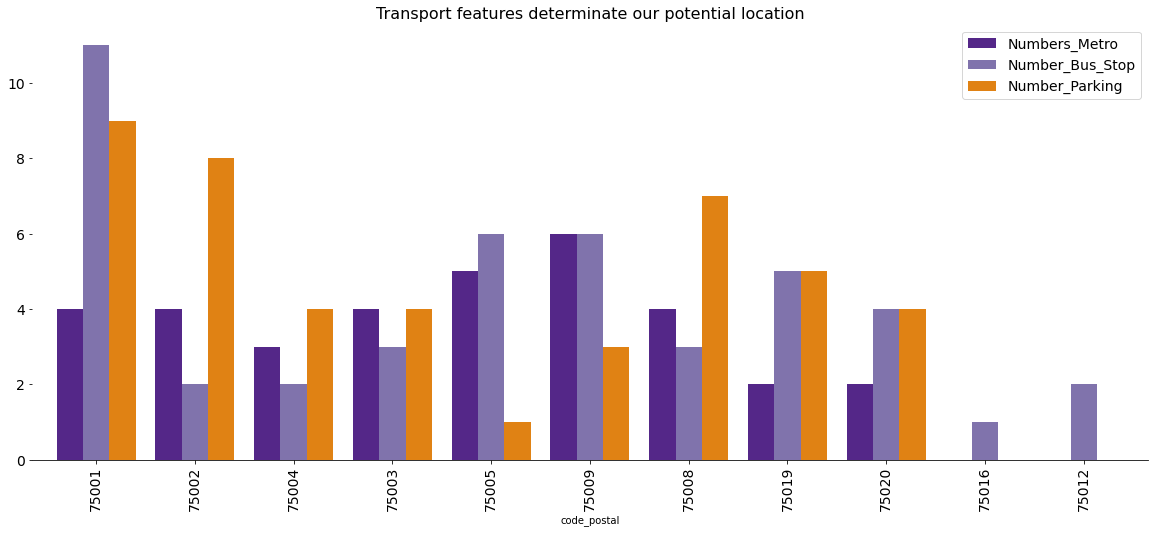

In [387]:
#3.Histogram of the transport features that determinate our potential location
ax=loc_paris_1_2_tr.plot(kind='bar', 
                  figsize=(20, 8), 
                  width=0.8, 
                  color=("#542788","#8073ac","#e08214" ), 
                  fontsize=14)
ax.set_title("Transport features determinate our potential location", 
             fontsize = 16)
ax.legend(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) 

In [388]:
#2.Create dataframe of Foods and Drinks features (Restaurant/bars) in the selected group of potential location
loc_paris_1_2_bar=loc_paris[['code_postal','Number_Restaurant','Number_Bar']].set_index('code_postal')
loc_paris_1_2_bar['number_Restaurant_over_mean'] = loc_paris_1_2_bar.apply(lambda x: x['Number_Restaurant'] >= int(loc_paris_1_2_bar['Number_Restaurant'].mean()), axis=1)
loc_paris_1_2_bar['Number_Bar_over_mean'] = loc_paris_1_2_bar.apply(lambda x: x['Number_Bar'] >= int(loc_paris_1_2_bar['Number_Bar'].mean()), axis=1)
loc_paris_1_2_bar

,Number_Restaurant,Number_Bar,number_Restaurant_over_mean,Number_Bar_over_mean
code_postal,,,,
75001,175.0,38.0,True,True
75002,199.0,99.0,True,True
75004,157.0,48.0,True,True
75003,182.0,54.0,True,True
75005,136.0,62.0,True,True
75009,167.0,57.0,True,True
75008,143.0,41.0,True,True
75019,48.0,12.0,False,False
75020,51.0,12.0,False,False


The table above shows that postal code 75001 to have all the features higher than each mean of transport’s features.

Let’s create a data frame of Foods and Drinks features (Restaurant/bars) in the selected group of potential location.
Bellow we can see that majority of Foods and Drinks features are below 200 per each postal code but postal code 75001 has one of the highest values.


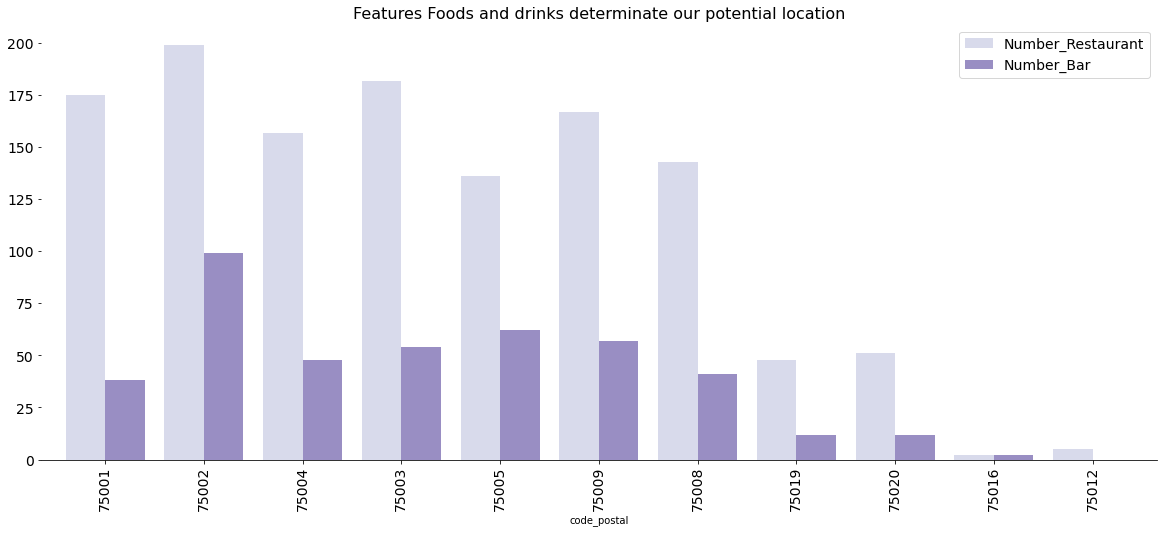

In [389]:
#4.Histogram of the Foods and Drinks features (Restaurant/bars) that determinate our potential location
ax=loc_paris_1_2_bar.plot(kind='bar', 
                  figsize=(20, 8), 
                  width=0.8, 
                  color=("#d8daeb","#998ec3","#f7f7f7","#d8daeb","#b2abd2","#8073ac" ), 
                  fontsize=14)
ax.set_title("Features Foods and drinks determinate our potential location", 
             fontsize = 16)
ax.legend(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) 

In [327]:
print('Mean of Number_Restaurant is :', loc_paris_1_2_bar['Number_Restaurant'].mean())
print('Mean of Number_Bar is:',loc_paris_1_2_bar['Number_Bar'].mean())

Mean of Number_Restaurant is : 115.0
Mean of Number_Bar is: 38.63636363636363


The table above shows that code postal 75001 continue to be a better option location having the restaurants over mean of category. 


## 5.Results and Discussion<a name="result"></a>

Our analysis shows that beside the fact there is a great number of hotels in Paris, there are places for hotels close to city center. 

We targeted the tourists that want to explore the attractions and enjoy French cuisine and night life. 
The highest concentration of hotels was detected in the first 10 district (at the center of Paris), but also the total distance to the principal top attractions in these districts is lower the mean of 30 km, also in plus is a low of density of restaurants, bars and very good connexions in Paris. 

After analysing the relations between the features, we found that our potential districts (postal code) have a positive correlations between the transport connections, number hotels and negative correlations between total distance directing our attention to this more narrow area of interest, taking as primarily feature total distance, so close to attraction and second number of hotels.

These location candidates were then clustered to create zones of interest which contain fewer number of locations. I used unsupervised learning K-means algorithm to cluster the districts. K-Means algorithm is one of the most common clustering methods of unsupervised learning.

First, I will run K-Means to cluster the districts into 3 clusters because analyzing the K-Means with Elbow method had ensured us the 3 degree is the optimum k of the K-Means.

We visualise the clusters using an interactive Plotly map that doesn’t indicate the possible location, but it indicates that there is a higher density of top attractions in cluster 1,  also they have more the average of number of hotel (bullet red outer color). Moreover, Cluster 2 is furthest from the attractions, but they also have the least number of hotels. 

The principal features that will influence our selection of Cluster are the total distance to the top attractions and the Number of Hotels around our potential location to be minimum.
Based on this we will now focus our analysis on areas of Cluster 1 (close to attractions) and Cluster 2 (least number of hotels). 

Examining our clusters also, we found the cluster 1 and 2 are the best location
To select our possible location, we will analyse the others features. We split those features in two group (Transport and Foods & Drinks). After plot the histograms we found that 75001 is the better optional for transport and second for restaurants.

Purpose of this analysis was to make a recommendation where will be good for opening an hotel having as target the tourists. 
 


## 6.Conclusion<a name="conclusion"></a>

Purpose of this project was to identify Paris areas close to top attractions with a low number of hotels which would be an optimal location for a new hotel.

Using Foursquare data, we visualise the clusters using an interactive Plotly map and we identify general districts that justify further analysis of cluster 1.

I use machine learning and use Kmean to help us to choose the better location. We selected cluster 1 and 2 as the best locations because of the negative correlation between number of hotels and distance to attractions we keep the minimum of these two features. 

We explore cluster data frame 1 and 2 in order to create a major zone of interest and visually inspect the selected Clusters, plotting data. 

Final decision on optimal restaurant location will be made by investors based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to attraction), proximity to metro, parking, bars, restaurants, etc.
